# Question-7

Imagine you have a dataset where you need to predict the Genres of Music
using an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\ASUS\Downloads\\data.csv")

In [3]:
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [5]:
data.isnull().sum()


filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [6]:
data.isna().sum()


filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [7]:
# Extract the features and labels
X = data.drop(["label","filename"], axis=1).values
y = data["label"].values

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

In [10]:
cluster_labels


array([2, 1, 4, 4, 3, 3, 2, 2, 1, 1, 1, 3, 2, 4, 3, 2, 2, 3, 3, 4, 2, 4,
       3, 2, 3, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 2, 1, 4, 3, 3, 4,
       2, 3, 3, 4, 4, 1, 2, 1, 4, 4, 2, 1, 3, 3, 2, 4, 2, 2, 4, 2, 4, 4,
       3, 2, 2, 1, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 1, 2, 4, 2, 3, 4, 2, 2,
       1, 1, 1, 1, 3, 1, 4, 2, 4, 2, 2, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 0, 2, 0, 0, 1, 0, 1, 4, 0, 4, 0, 3, 1, 0, 0, 3, 1, 2, 3, 0,
       4, 0, 1, 0, 2, 4, 3, 4, 0, 3, 3, 4, 3, 0, 3, 1, 1, 3, 4, 2, 3, 4,
       4, 1, 3, 0, 4, 3, 4, 3, 3, 2, 4, 3, 0, 2, 4, 0, 0, 3, 4, 1, 4, 4,
       3, 2, 4, 3, 0, 3, 3, 3, 0, 3, 4, 1, 1, 3, 3, 3, 0, 3, 1, 2, 1, 2,
       3, 4, 4, 4, 1, 3, 3, 4, 2, 4, 4, 4, 0, 4, 2,

In [11]:
# Evaluate the quality of the clusters using silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1958779372054942


In [12]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# Perform Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)

# # Perform DBSCAN clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_scaled)
# dbscan_score = silhouette_score(X_scaled, dbscan_labels)

In [13]:
# Perform Gaussian Mixture Models (GMM) clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)
gmm_score = silhouette_score(X_scaled, gmm_labels)

In [14]:
# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agg_score)
# print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)

K-means Silhouette Score: 0.1958779372054942
Agglomerative Silhouette Score: 0.11830326630487888
GMM Silhouette Score: 0.18698520367398339


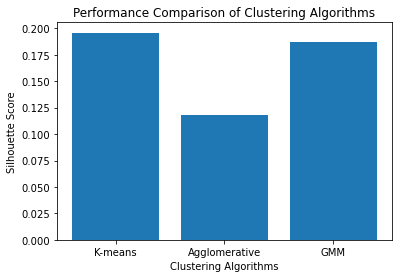

In [15]:
# Calculate the silhouette scores for each algorithm
silhouette_scores = [kmeans_score, agg_score, gmm_score]

# Define the names of the algorithms
algorithms = ['K-means', 'Agglomerative', 'GMM']

# Plot the bar chart
plt.bar(algorithms, silhouette_scores)
plt.xlabel('Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.title('Performance Comparison of Clustering Algorithms')
plt.show()